In [43]:

import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import seaborn as sns 
import os
import numpy as np


root = "/Users/andersbensen/Documents/github/synthetic_tabular_data"
os.chdir(os.path.expanduser(root))

In [44]:
from src.data import get_dataset

X, X_mean, X_std, columns, df_og = get_dataset(f"{root}/datasets/winequality-red.csv")
df = df_og.copy(deep=True)

In [45]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### GENERATE 

In [46]:
from src.models import Generator

latent_dim = 2

G_2d = Generator(latent_dim=latent_dim, data_dim=df_og.shape[1])
G_2d.load_state_dict(torch.load(f"{root}/models/sota_2d/generator.pt"))


<All keys matched successfully>

In [47]:
amount = df_og.shape[0]
noise_2d = torch.randn(amount, latent_dim)

generated_2d = G_2d(noise_2d).detach().numpy()
generated_2d = generated_2d * X_std + X_mean

df_2d = pd.DataFrame(generated_2d, columns=columns)

Text(0, 0.5, 'Z2')

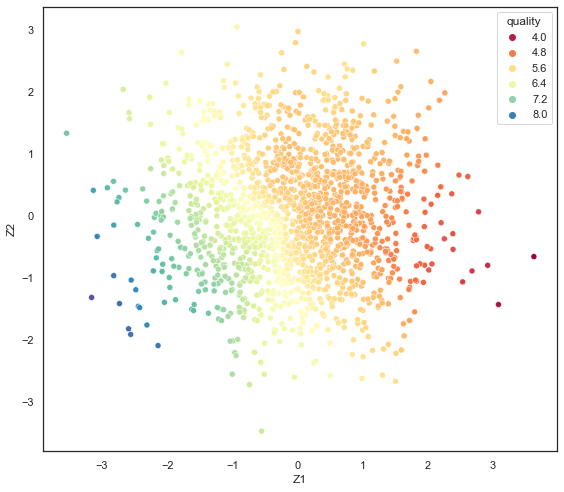

In [48]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8, 7

sns.scatterplot(x=noise_2d[:,0], y=noise_2d[:,1], hue=df_2d['quality'], palette="Spectral")
plt.xlabel("Z1")
plt.ylabel("Z2")

# 3d generation

In [49]:
from src.models import Generator
import torch

latent_dim = 3

G = Generator(latent_dim=latent_dim, data_dim=df.shape[1])
G.load_state_dict(torch.load(f"{root}/models/sota_3d/generator.pt"))

<All keys matched successfully>

In [50]:
amount = df_og.shape[0]

noise = torch.randn(amount, latent_dim)

In [51]:
X_fake = G(noise).detach().numpy()
generated = X_fake * X_std + X_mean

generated.shape

(1599, 12)

In [52]:
df_g = pd.DataFrame(generated, columns=columns)

df['kind'] = "real"
df_g['kind'] = "fake"

df_merged = pd.concat([df, df_g], ignore_index=True)

/var/folders/gk/b96f_3b92yx59x_09tc9d6bm0000gn/T/ipykernel_69208/1368006986.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


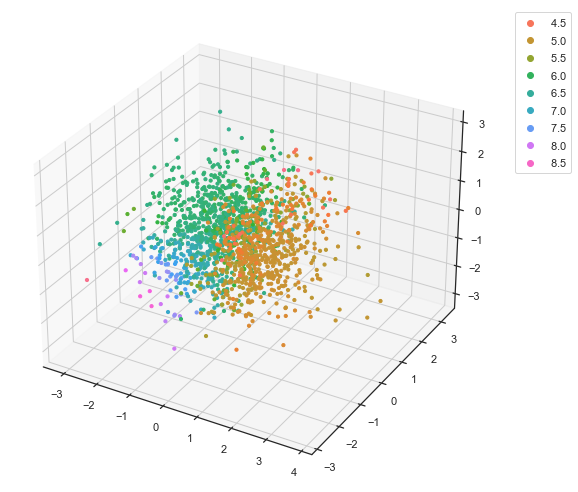

In [53]:
from matplotlib.colors import ListedColormap

rcParams["figure.figsize"] = [8, 7]
rcParams["figure.autolayout"] = True

x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sc = ax.scatter(noise[:,0], noise[:,1], noise[:,2], s=10, c=df_g['quality'].values, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


# PERFORMANCE

/var/folders/gk/b96f_3b92yx59x_09tc9d6bm0000gn/T/ipykernel_69208/2472095197.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_real_mean = df.mean().values
/var/folders/gk/b96f_3b92yx59x_09tc9d6bm0000gn/T/ipykernel_69208/2472095197.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_real_std = df.std().values
/var/folders/gk/b96f_3b92yx59x_09tc9d6bm0000gn/T/ipykernel_69208/2472095197.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fake_mean = df_g.mean().values
/var/folde

Text(0.5, 1.0, 'Std. of each feature')

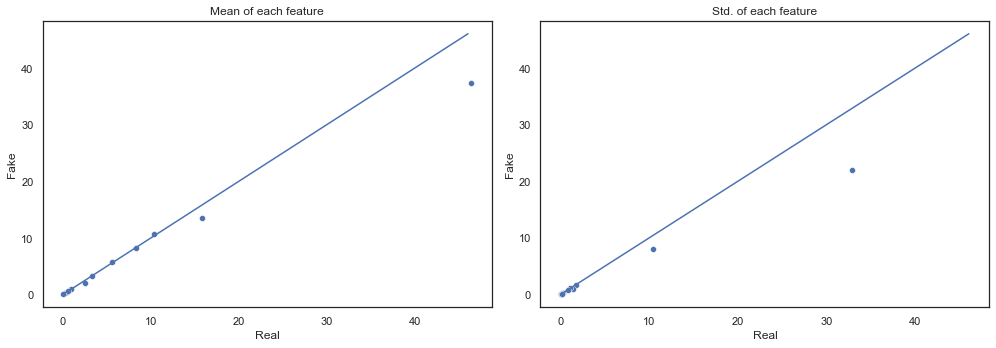

In [54]:
_, axes = plt.subplots(1, 2, figsize=(14,5))

df_real_mean = df.mean().values
df_real_std = df.std().values

df_fake_mean = df_g.mean().values
df_fake_std = df_g.std().values


min_mean = min([df_fake_mean.min(), df_real_mean.min()])
max_mean = max([df_fake_mean.max(), df_real_mean.max()])
line_mean = np.arange(min_mean, max_mean)

sns.scatterplot(df_real_mean, df_fake_mean, ax=axes[0])
sns.lineplot(x=line_mean, y=line_mean, ax=axes[0])
axes[0].set_xlabel("Real")
axes[0].set_ylabel("Fake")
axes[0].set_title("Mean of each feature")


min_std = min([df_fake_std.min(), df_real_std.min()])
max_std = max([df_fake_std.max(), df_real_std.max()])
line_std = np.arange(min_mean, max_mean)

sns.scatterplot(df_real_std, df_fake_std, ax=axes[1])
sns.lineplot(x=line_std, y=line_std, ax=axes[1])
axes[1].set_xlabel("Real")
axes[1].set_ylabel("Fake")
axes[1].set_title("Std. of each feature")


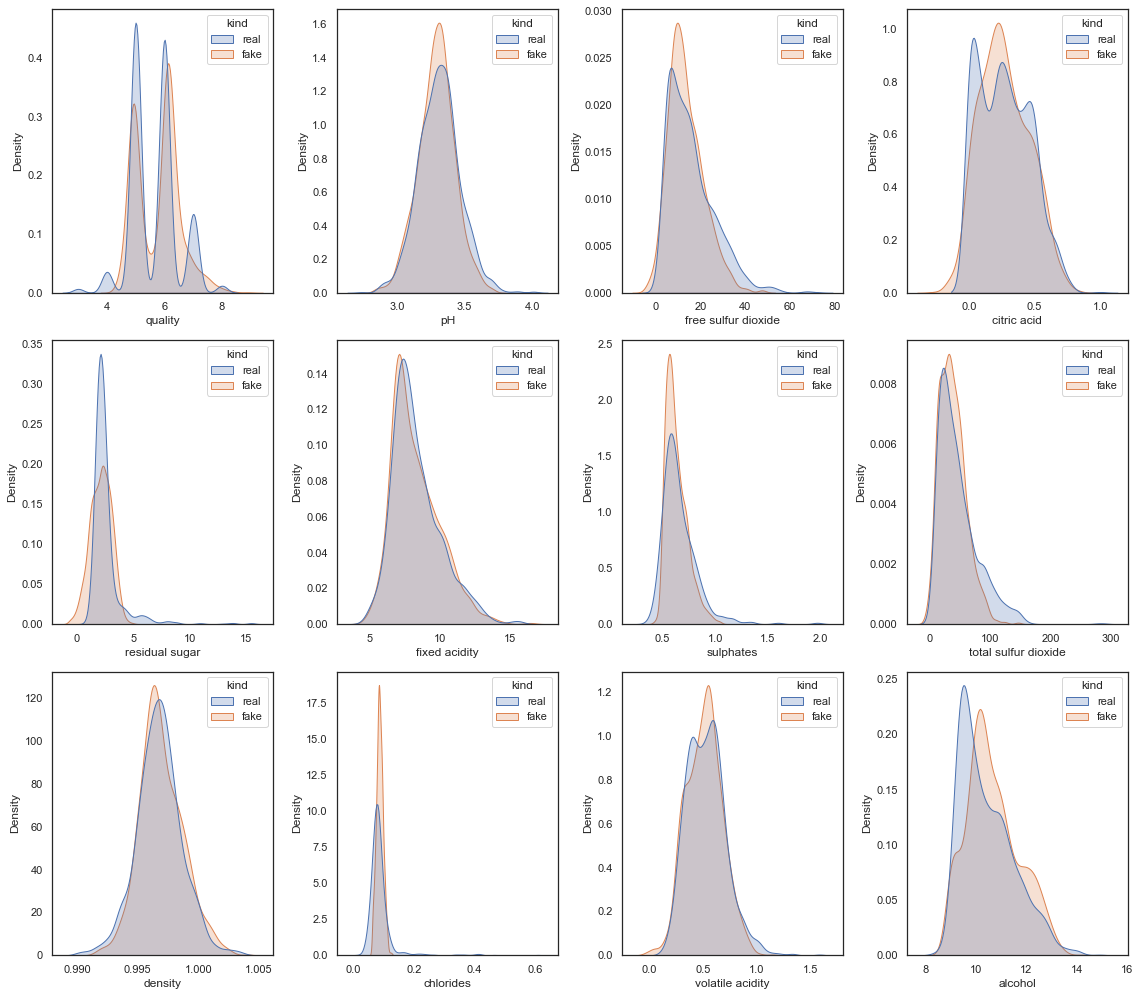

In [55]:
fig, axes = plt.subplots(3, 4, figsize=(16,14))

i, j = 0, 0 
for col in columns:
    i += 1
    j += 1

    if i == 3: i = 0
    if j == 4: j = 0
    
    sns.kdeplot(data=df_merged, x=col, hue='kind', fill=True, ax=axes[i ,j])

### How about correlation?

Text(0.5, 1.0, 'Difference')

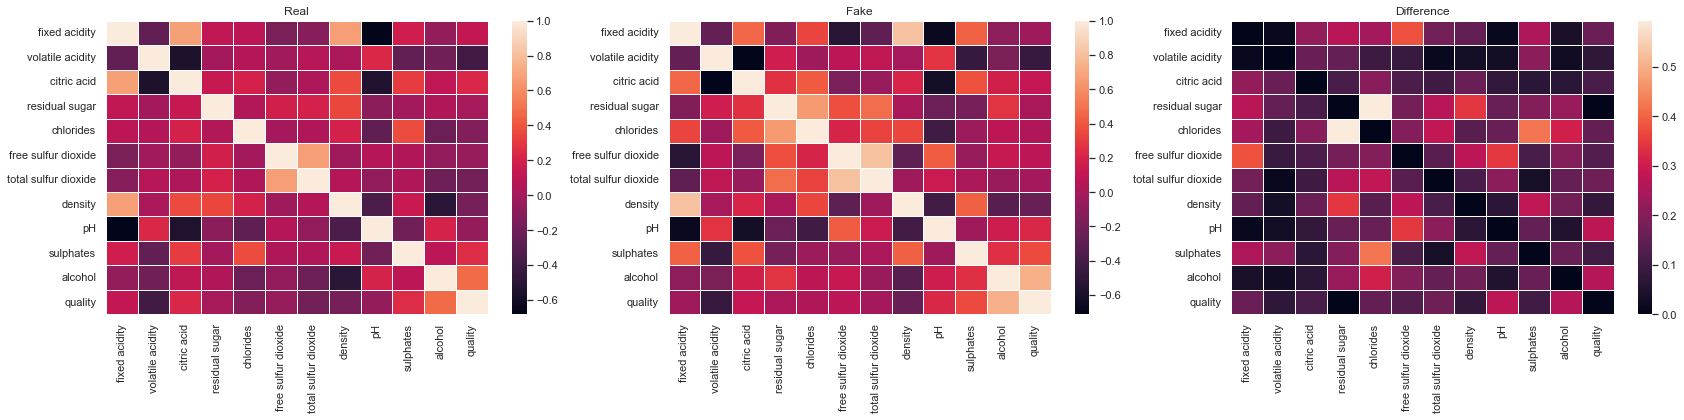

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(24,6))

sns.set(style="white")

corr_real = df.corr()
sns.heatmap(corr_real, linewidth=.5, ax=axes[0])
axes[0].set_title("Real")

corr_fake = df_g.corr()
sns.heatmap(corr_fake, linewidth=.5, ax=axes[1])
axes[1].set_title("Fake")

corr_diff = abs(corr_real - corr_fake)
sns.heatmap(corr_diff, linewidth=.5, ax=axes[2])
axes[2].set_title("Difference")


### PCA

In [57]:
X_real = ((X - X_mean) * X_std)

In [58]:
X_fake = ((generated - X_mean) * X_std) 

In [59]:
from sklearn.decomposition import PCA

pca_real = PCA(n_components=2).fit(X_real)
X_trans_real = pca_real.transform(X_real)

pca_fake = PCA(n_components=2).fit(X_fake)
X_trans_fake = pca_fake.transform(X_fake)

In [60]:
X_trans_real

array([[-412.51458521,  -23.08322539],
       [ 680.11547614,   49.46548451],
       [ 246.50862003,  -25.9045759 ],
       ...,
       [-202.9074986 ,  151.35238096],
       [ -69.54420249,  173.74070492],
       [-145.07913657,   32.14197915]])

In [61]:
outliers = np.where(X_trans_real[:,0] > 6000)
X_trans_real = np.delete(X_trans_real, outliers[0], axis=0)

Text(0.5, 1.0, 'Fake')

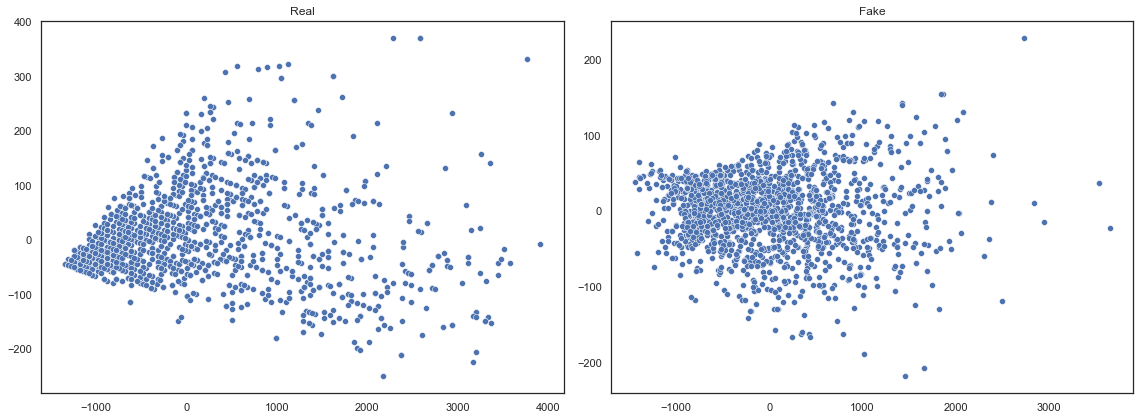

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.scatterplot(x=X_trans_real[:,0], y=X_trans_real[:,1], ax=axes[0])
axes[0].set_title("Real")

sns.scatterplot(x=X_trans_fake[:,0], y=X_trans_fake[:,1], ax=axes[1])
axes[1].set_title("Fake")